## **Acquiring and Loading Data**

In [ ]:
#importing necessery libraries for future analysis of the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#using pandas library and 'read_csv' function to read Airbnb NYC 2019 csv file

df_airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AB_NYC_2019.csv')
df_airbnb.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## **Data Exploration and variable Identification**

In [ ]:
#checking info about dataset
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_airbnb.shape

(48895, 16)

This dataset has around 48895 observations in it with 16 columns(features) and it is a mix between categorical and numeric values.

## **Understanding Data**



>**Finding numerical and categorical variables**


In [ ]:
#checking what are the variables here:
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


By obsevations we get to that **'name'** column represents **property name** and and perticular properties were hosted by perticular **hosts** who are represented in **'host_name'** column. But a particular **host_name** can have multiple properties in a area. So host_name is like one of the catogerical variable like **neighbourhood(areas)**, **neighbourhood_group**, and **room_type**.


In [ ]:
#let's proceed with examing some categorical unique values

#examining the unique values of neighbourhood_group
df_airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#examining the unique values of neighbourhood
df_airbnb['neighbourhood'].nunique()

221

In [ ]:
#examining the unique values of room_type
df_airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df_airbnb['host_id'].nunique()

37457

In [ ]:
df_airbnb['host_name'].nunique()

11452

In [ ]:
df_airbnb['name'].unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [ ]:
unique_names = df_airbnb['name'].unique()
print(unique_names)
#  few listings have no particular host name as below observation
#also few listings/property with same names has different hosts in different neighbourhoods of a neighbourhood_group

['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]


In [ ]:
df_airbnb[df_airbnb['name']=='New york Multi-unit building'].head(5)
# same property but hosted by different Airbnb hosts with different room_types & varied price range

id                          name    host_id host_name  \
2751    1489426  New york Multi-unit building    7964729    Justin   
19016  15100883  New york Multi-unit building   95623284     Pablo   
33473  26463879  New york Multi-unit building   21682640   Clarise   
34613  27457026  New york Multi-unit building  125320407      Sata   
35177  27906346  New york Multi-unit building   27071572     Kinga   

      neighbourhood_group       neighbourhood  latitude  longitude  \
2751            Manhattan  Financial District  40.70582  -74.00888   
19016               Bronx             Fordham  40.86533  -73.89713   
33473            Brooklyn            Flatbush  40.64258  -73.95952   
34613              Queens             Jamaica  40.70653  -73.80561   
35177           Manhattan     Upper West Side  40.79372  -73.97431   

             room_type  price  minimum_nights  number_of_reviews last_review  \
2751   Entire home/apt    390               3                  1  2018-09-13   
19016     Private room     40               3                  1  2018-09-24   
33473     Private room     65              30                  0         NaN   
34613  Entire home/apt   1000               2                  0         NaN   
35177  Entire home/apt    140               5                  3  2019-04-24   

       reviews_per_month  calculated_host_listings_count  availability_365  
2751                0.10                               1                 0  
19016               0.10                               1               179  
33473                NaN                               2               365  
34613                NaN                               5               365  
35177               0.29                               1                89

In [ ]:
df_airbnb.loc[(df_airbnb['neighbourhood_group']=='Manhattan') & (df_airbnb['host_name']=='Natasha')]

id                                               name    host_id  \
4702    3304307                   Lovely Shiny Private Room in NYC   12465884   
4853    3458525                       Modern & Cozy 1BD Garden Apt   17430718   
8686    6673630                               Stylish L.E.S Studio    6591262   
9376    7193201                Private RM in Heart of East Village   33739627   
10310   7894907                        Cosy studio in East Village    1830864   
11344   8813547     For Christmas-Large New 1 BR Near Central Park   30350590   
20061  16066223      Spacious, quiet 1 br apt in beautiful Inwood!    1713011   
21145  16779705                           Cozy West Village Studio   11699846   
22125  17808917                  Gorgeous & Spacious UES apartment   85218001   
24200  19499668                   Cozy Sofa Bed in Upper Manhattan    3372118   
28787  22231811          Stylish & Spacious 1BD in Central Harlem!   17430718   
39111  30528541                       New york Multi-unit building   95575605   
40611  31494165  Sunny Cosy Private Room Hell's Kitchen & Broadway   33464426   
42630  33094220  Bright and Quiet near Union Square in the Village  249069377   
48452  36272531           Charming TriBeCa Loft - Avail for Summer  194377959   
48749  36417643    Luxury private room apt near Central Park (UES)   49796302   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
4702    Natasha           Manhattan         East Harlem  40.79269  -73.94218   
4853    Natasha           Manhattan              Harlem  40.81511  -73.94315   
8686    Natasha           Manhattan     Lower East Side  40.71661  -73.98916   
9376    Natasha           Manhattan        East Village  40.72896  -73.98430   
10310   Natasha           Manhattan        East Village  40.72395  -73.98001   
11344   Natasha           Manhattan    Theater District  40.76268  -73.98407   
20061   Natasha           Manhattan              Inwood  40.86757  -73.92699   
21145   Natasha           Manhattan   Greenwich Village  40.73239  -73.99960   
22125   Natasha           Manhattan     Upper East Side  40.77666  -73.95618   
24200   Natasha           Manhattan  Washington Heights  40.84133  -73.93739   
28787   Natasha           Manhattan              Harlem  40.81537  -73.94067   
39111   Natasha           Manhattan             Chelsea  40.74726  -73.99029   
40611   Natasha           Manhattan      Hell's Kitchen  40.76453  -73.98527   
42630   Natasha           Manhattan   Greenwich Village  40.73424  -73.99355   
48452   Natasha           Manhattan             Tribeca  40.72262  -74.00861   
48749   Natasha           Manhattan         East Harlem  40.79339  -73.93784   

             room_type  price  minimum_nights  number_of_reviews last_review  \
4702      Private room    100               3                 64  2019-06-01   
4853   Entire home/apt    115               3                 64  2019-06-19   
8686   Entire home/apt    150               3                  1  2015-08-01   
9376      Private room     99               1                  4  2015-10-24   
10310  Entire home/apt    150               2                 25  2016-07-22   
11344     Private room    230               5                 10  2016-09-10   
20061  Entire home/apt     89              14                 14  2019-05-13   
21145  Entire home/apt    103               2                 15  2018-10-28   
22125     Private room    105               2                  8  2018-06-16   
24200      Shared room     50               1                 21  2019-06-15   
28787  Entire home/apt    135               3                 21  2019-06-10   
39111  Entire home/apt    250               7                  0         NaN   
40611     Private room     80               3                  8  2019-05-29   
42630     Private room    120               1                  7  2019-06-12   
48452  Entire home/apt    250              21                  0         N

In [ ]:
# there are few listings where the property name and the host have same names
df_airbnb[df_airbnb['name']==df_airbnb['host_name']]

id            name    host_id       host_name  \
9473    7264659         Olivier    6994503         Olivier   
10682   8212051           Monty   43302952           Monty   
16422  13186374            Sean   35143476            Sean   
23996  19348168             Cyn   74033595             Cyn   
24152  19456810  Hillside Hotel  134184451  Hillside Hotel   
24607  19785737  Hillside Hotel  134184451  Hillside Hotel   
26734  21231543  Hillside Hotel  134184451  Hillside Hotel   
26752  21243952  Hillside Hotel  134184451  Hillside Hotel   
26753  21244035  Hillside Hotel  134184451  Hillside Hotel   
26889  21311903  Hillside Hotel  134184451  Hillside Hotel   
26891  21312075  Hillside Hotel  134184451  Hillside Hotel   
26892  21312191  Hillside Hotel  134184451  Hillside Hotel   
26893  21312225  Hillside Hotel  134184451  Hillside Hotel   
26894  21312283  Hillside Hotel  134184451  Hillside Hotel   
26895  21312330  Hillside Hotel  134184451  Hillside Hotel   
26896  21312403  Hillside Hotel  134184451  Hillside Hotel   
26897  21312440  Hillside Hotel  134184451  Hillside Hotel   
26898  21312495  Hillside Hotel  134184451  Hillside Hotel   
26899  21312549  Hillside Hotel  134184451  Hillside Hotel   
26900  21312595  Hillside Hotel  134184451  Hillside Hotel   
26901  21312687  Hillside Hotel  134184451  Hillside Hotel   
26902  21312732  Hillside Hotel  134184451  Hillside Hotel   
27186  21488093             Rod  128142697             Rod   
33964  26895166    2018Serenity  202318295    2018Serenity   
43564  33718254        Imperial  249479517        Imperial   
45510  34803347              Yu  197052947              Yu   

      neighbourhood_group       neighbourhood  latitude  longitude  \
9473            Manhattan     Upper West Side  40.78931  -73.97520   
10682            Brooklyn       East Flatbush  40.66383  -73.92706   
16422            Brooklyn     Windsor Terrace  40.65182  -73.98043   
23996            Brooklyn  Bedford-Stuyvesant  40.67850  -73.91478   
24152              Queens           Briarwood  40.70454  -73.81549   
24607              Queens             Jamaica  40.70445  -73.81399   
26734              Queens             Jamaica  40.70428  -73.81353   
26752              Queens             Jamaica  40.70288  -73.81531   
26753              Queens             Jamaica  40.70319  -73.81410   
26889              Queens             Jamaica  40.70258  -73.81510   
26891              Queens             Jamaica  40.70333  -73.81380   
26892              Queens             Jamaica  40.70259  -73.81415   
26893              Queens             Jamaica  40.70262  -73.81526   
26894              Queens           Briarwood  40.70450  -73.81447   
26895              Queens           Briarwood  40.70458  -73.81418   
26896              Queens             Jamaica  40.70423  -73.81440   
26897              Queens             Jamaica  40.70269  -73.81585   
26898              Queens             Jamaica  40.70426  -73.81509   
26899              Queens             Jamaica  40.70262  -73.81579   
26900              Queens           Briarwood  40.70475  -73.81572   
26901              Queens           Briarwood  40.70471  -73.81542   
26902              Queens           Briarwood  40.70455  -73.81528   
27186           Manhattan     Upper East Side  40.76719  -73.96973   
33964           Manhattan         East Harlem  40.79424  -73.94290   
43564               Bronx           Soundview  40.82864  -73.87609   
45510           Manhattan    Roosevelt Island  40.76417  -73.94865   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9473   Entire home/apt    200               5                 12  2018-01-30   
10682      Shared room     95               2                  7  2015-10-30   
16422  Entire home/apt    400               7                  0         NaN   
23996     Private room     75               2                  1  2018-09-10   
24152     Private room     93               1  

The data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb.

Also, a host can have multiple properties in a neighbourhood group with different host-ids

There are few listings where the property name and the host have same names. Also

We'll not bother much as these are not that important in our analysis and proceed further

In [ ]:
#  to find numerical veriables(overall summary)
df_airbnb.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

id, latitude, longitude, price, minimum_nights, number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365 are numerical variables

## **Handeling NaN Values**

In [ ]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

So far we get to know that columns such as 'id' , 'last_review' are of no use for this prticular analysis. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month.

In [ ]:
#dropping columns that are not significant
df_airbnb.drop(['id','last_review'], axis=1, inplace=True)

In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0

df_airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df_airbnb.reviews_per_month.isnull().sum()

0

Also, **host_names and names are not that important in our analysis**, so atleast we are good to fill those with some substitutes in both the columns

In [ ]:
#filling these missing values in both with unknown & no_name respectively!

df_airbnb['name'].fillna('unknown',inplace=True)
df_airbnb['host_name'].fillna('no_name',inplace=True)

In [ ]:
#examing changes
df_airbnb.name.isnull().sum()

0

In [ ]:
#examing changes
df_airbnb.host_name.isnull().sum()

0

In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

# Exploring and Visualizing Data


if a person trying to book a listing for stay/rent he/she will look into these following factors while booking: **neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews** these are the important ones in our analysis.





> **Let's check the correlation matrix to understand how are the features corelated with each other. Also to get an idea which are the most important features in this data**



<ipython-input-26-902fe60db022>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_airbnb.corr()


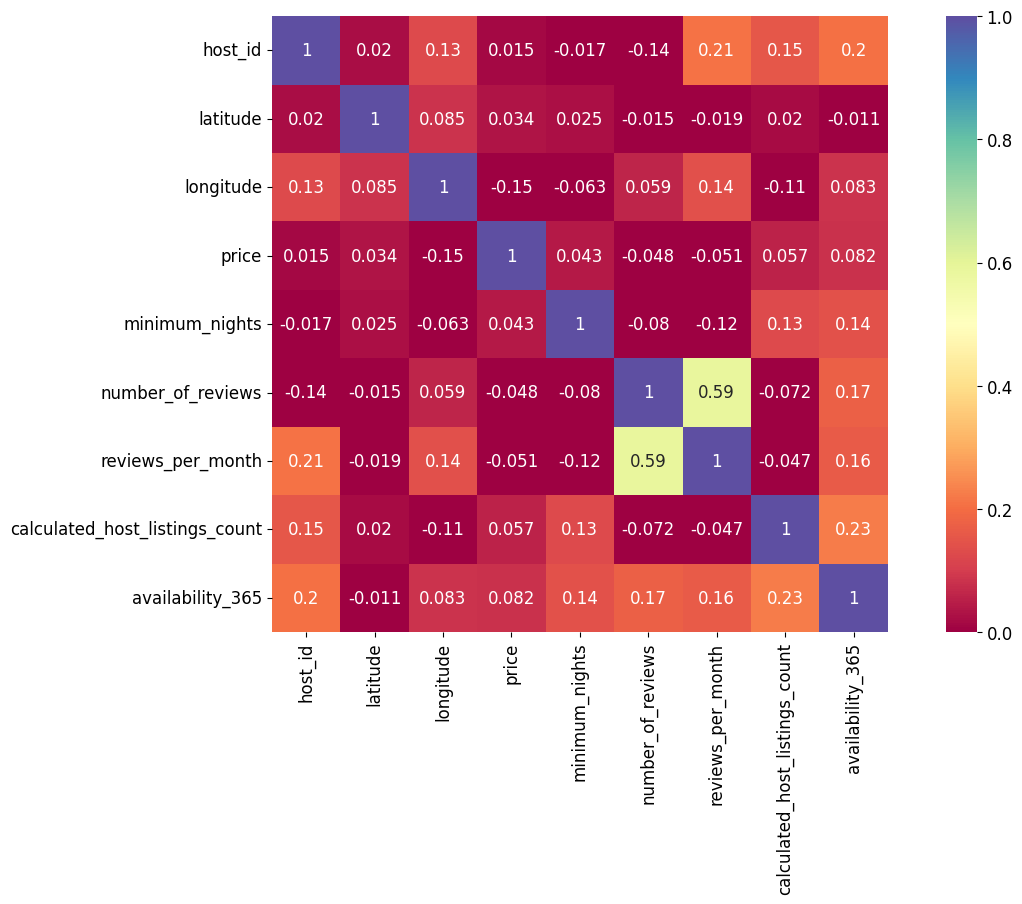

In [ ]:
#correlation matrix
plt.figure(figsize=(15,8))
plt.rcParams['font.size'] =12
corrmat = df_airbnb.corr()
sns.heatmap(corrmat, vmin = 0.0 ,vmax=1.0, square=True , annot= True, cmap='Spectral');



> From the heatmap we can see the correlation between different features that can affect a airbnb listing.

There's correlation among **host_id to reveiws_per_month & availability_365**. Also there's correlation between **min_nights to no_of_listings_count & availability_365.** Price also shows some correlation with availability_365 & host_listings_count.
**bold text**
no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, **no_of_reviews is correlated to availability_365!**



# Single Variable Analysis



> **1.top 10 hosts (IDs) have the most listings**



In [ ]:
#top 10 hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service

top_host = df_airbnb.host_id.value_counts().head(10)
top_host.reset_index()

df_top_host = pd.DataFrame(top_host)
df_top_host.reset_index(inplace=True)
df_top_host.rename(columns={'index':'host_id','host_id':'count'},inplace=True)
df_top_host


host_id  count
0  219517861    327
1  107434423    232
2   30283594    121
3  137358866    103
4   16098958     96
5   12243051     96
6   61391963     91
7   22541573     87
8  200380610     65
9    7503643     52

<ipython-input-28-1da1e68409a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz=sns.barplot(x='host_id', y='count', data=df_top_host, palette="PuBu")
<ipython-input-28-1da1e68409a6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels())


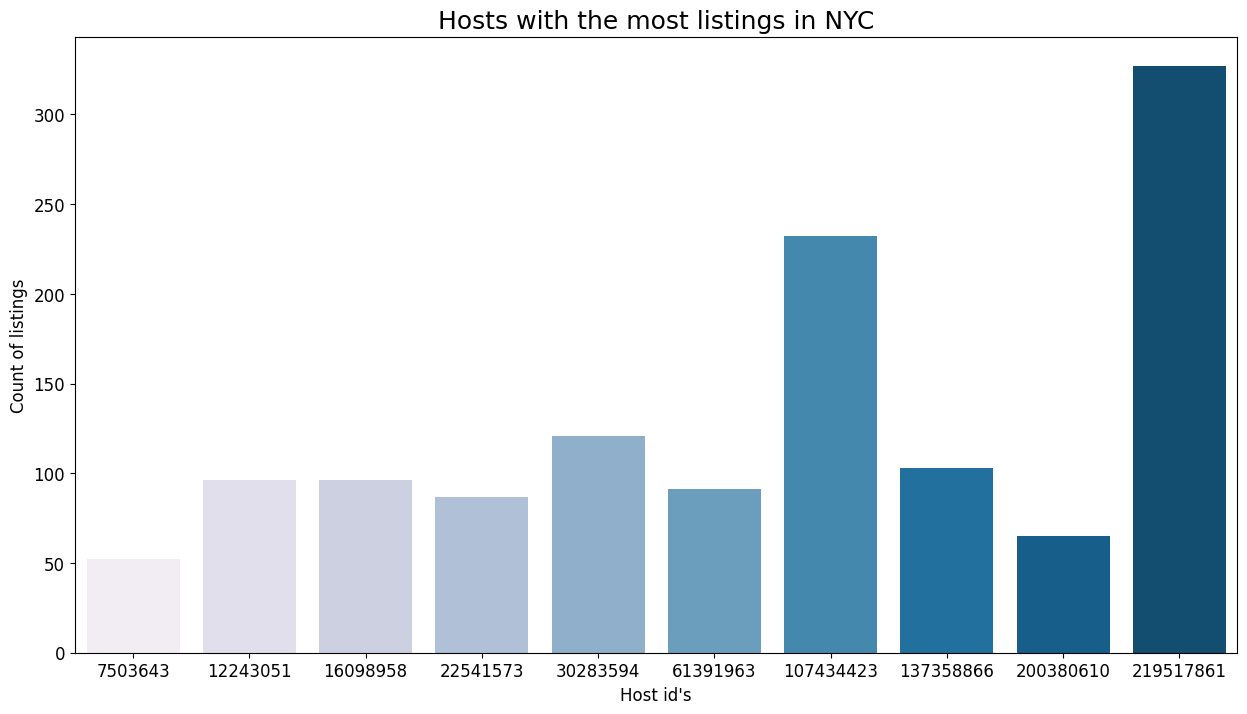

In [ ]:
plt.figure(figsize=(15,8))
viz=sns.barplot(x='host_id', y='count', data=df_top_host, palette="PuBu")
viz.set_title('Hosts with the most listings in NYC', size=18)
viz.set_ylabel('Count of listings')
viz.set_xlabel('Host id\'s')
viz.set_xticklabels(viz.get_xticklabels())
plt.show()

**2.top 5 listings on Airbnb in entire NYC**



In [ ]:
#top 5 listings on Airbnb in entire NYC:

listings_count_df=df_airbnb['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

Listings on Airbnb  Total_listings
0                Hillside Hotel              18
1           Home away from home              17
2                       unknown              16
3  New york Multi-unit building              16
4            Brooklyn Apartment              12


Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.



**3.top 10 hosts on the basis of no of listings in entire NYC**



In [ ]:
top_10_hosts=df_airbnb['host_name'].value_counts()[:10]
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

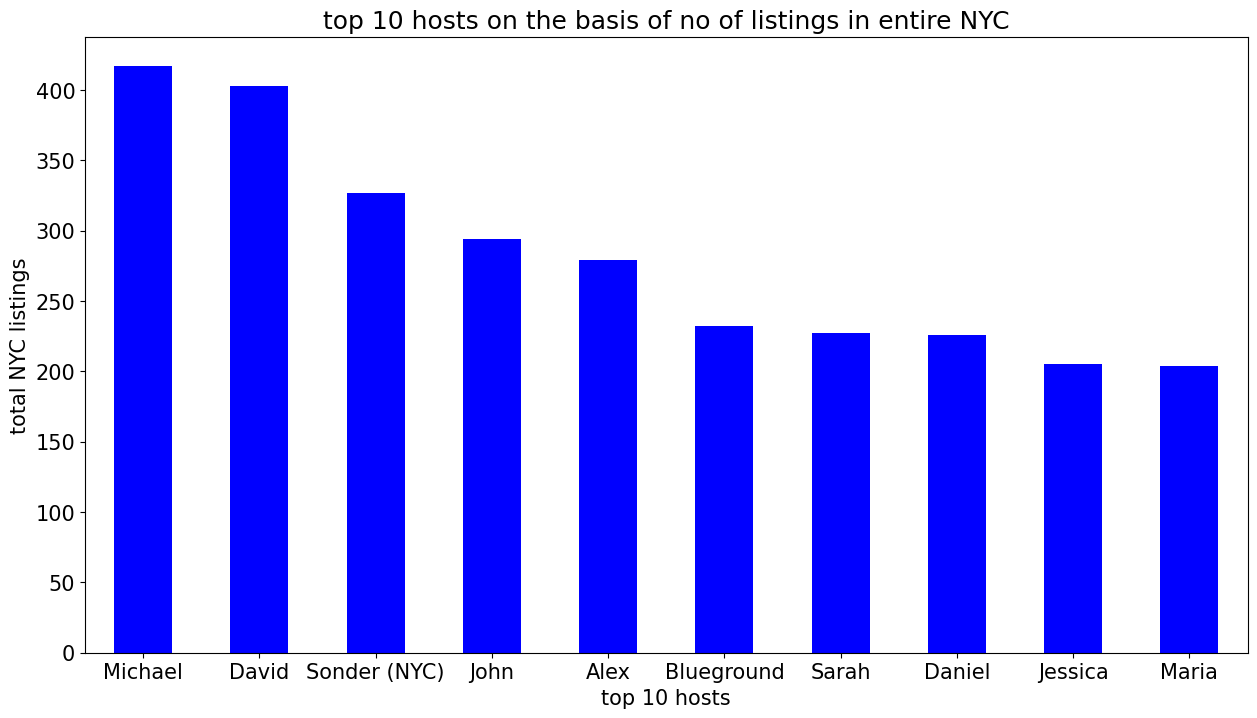

In [ ]:
plt.figure(figsize=(15,8))
plt.rcParams['font.size'] =15
top_10_hosts.plot(kind='bar',color='b', rot = 0)
plt.xlabel('top 10 hosts')
plt.ylabel('total NYC listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC')
plt.show()

**4.the neighbourhood group vs no of listings in entire NYC**


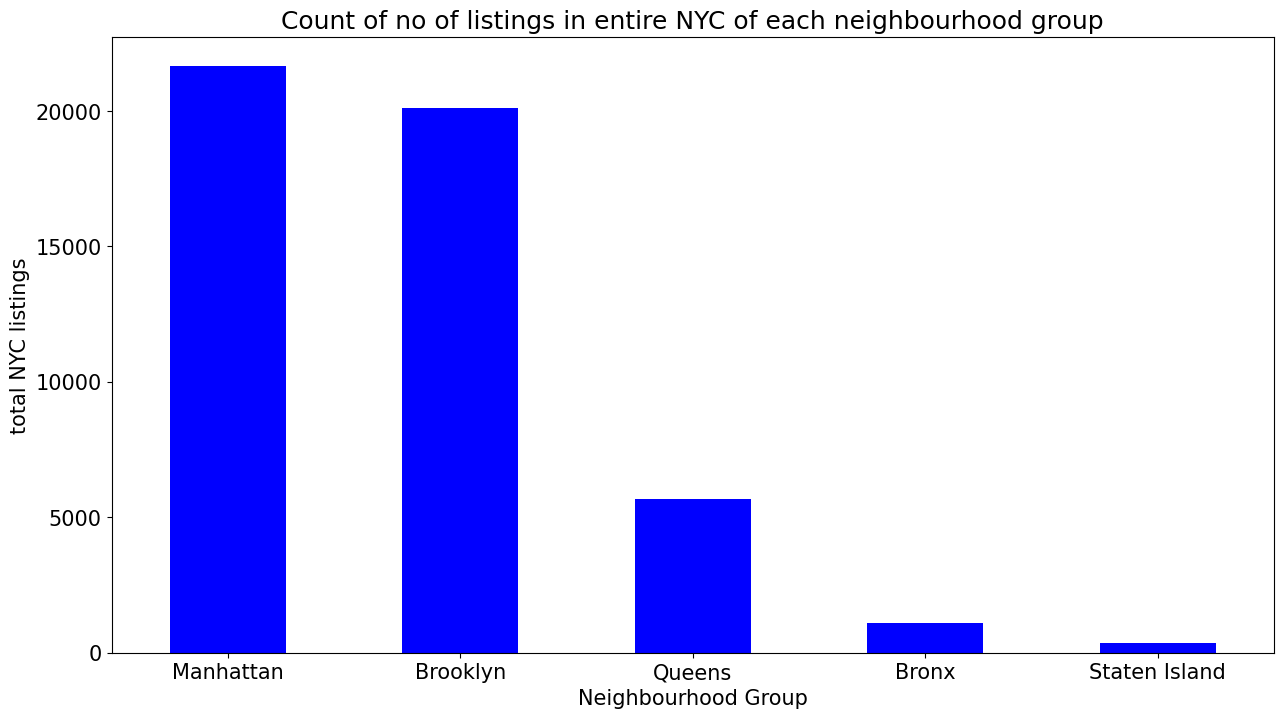

In [ ]:
plt.figure(figsize=(15,8))
plt.rcParams['font.size'] =15
df_airbnb['neighbourhood_group'].value_counts().plot(kind='bar',color='b', rot = 0)
plt.xlabel('Neighbourhood Group')
plt.ylabel('total NYC listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group')
plt.show()

the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC

**5.Top 10 neighbourhoods in entire NYC on the basis of count of listings**

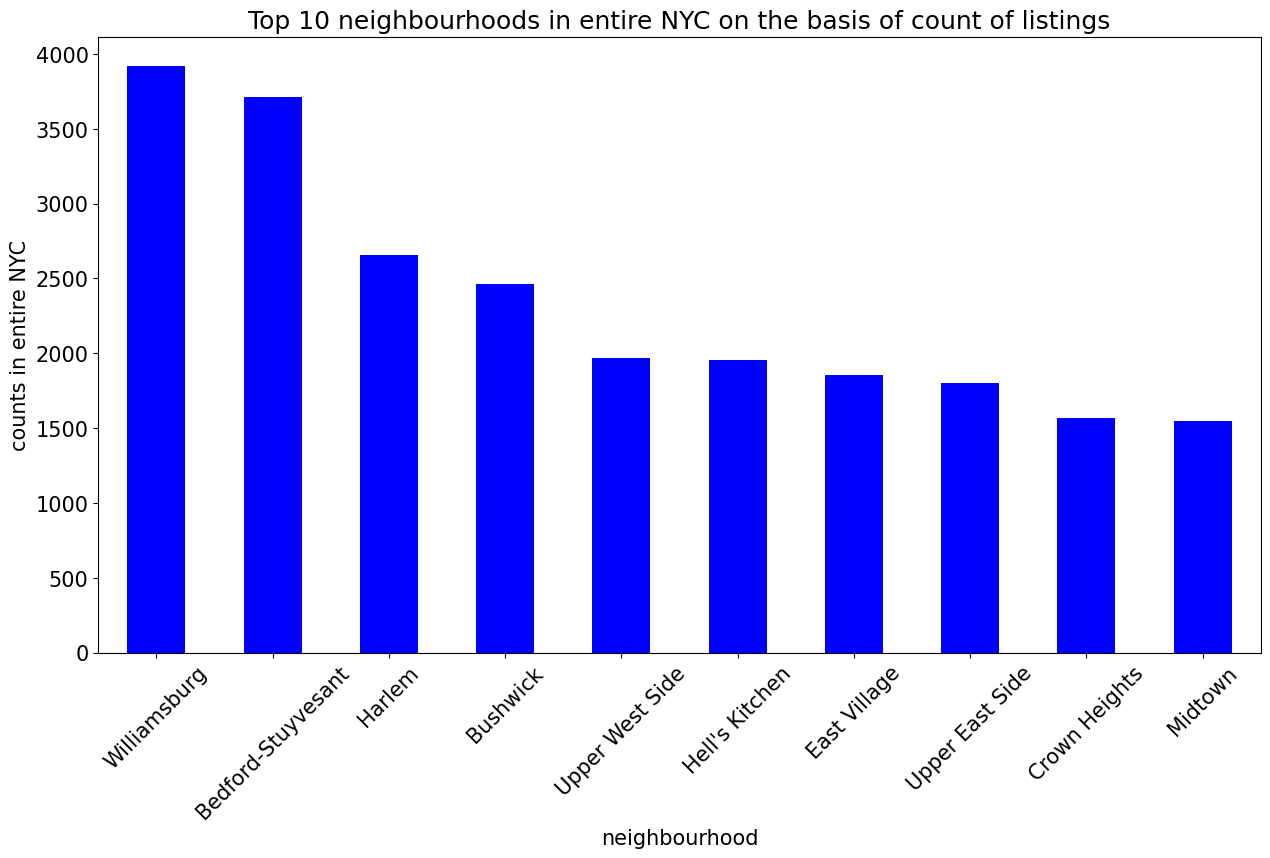

In [ ]:
plt.figure(figsize=(15,8))
plt.rcParams['font.size'] = 15
top_10_neigbours= df_airbnb['neighbourhood'].value_counts()[:10]
top_10_neigbours.plot(kind='bar',color='b', rot = 45)
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top 10 neighbourhoods in entire NYC on the basis of count of listings')
plt.show()

**6.Top 10 reviewed hosts on the basis of reviews/month**

In [ ]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df_airbnb.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['host_name','reviews_per_month','neighbourhood_group']]

host_name  reviews_per_month neighbourhood_group
42075   Row NYC              58.50           Manhattan
42076   Row NYC              27.95           Manhattan
38870    Louann              20.94              Queens
27287   Nalicia              19.75              Queens
28651   Nalicia              17.82              Queens
29628   Nalicia              16.81              Queens
20403  Danielle              16.22              Queens
22469  Danielle              16.03              Queens
36238     Brent              15.78              Queens
40297  Lakshmee              15.32              Queens


So, this are the listings with highest number of reviews, the highest being: Enjoy great views of the City in our Deluxe Room! with 58 reviews/month followed by Great Room in the heart of Times Square! with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.



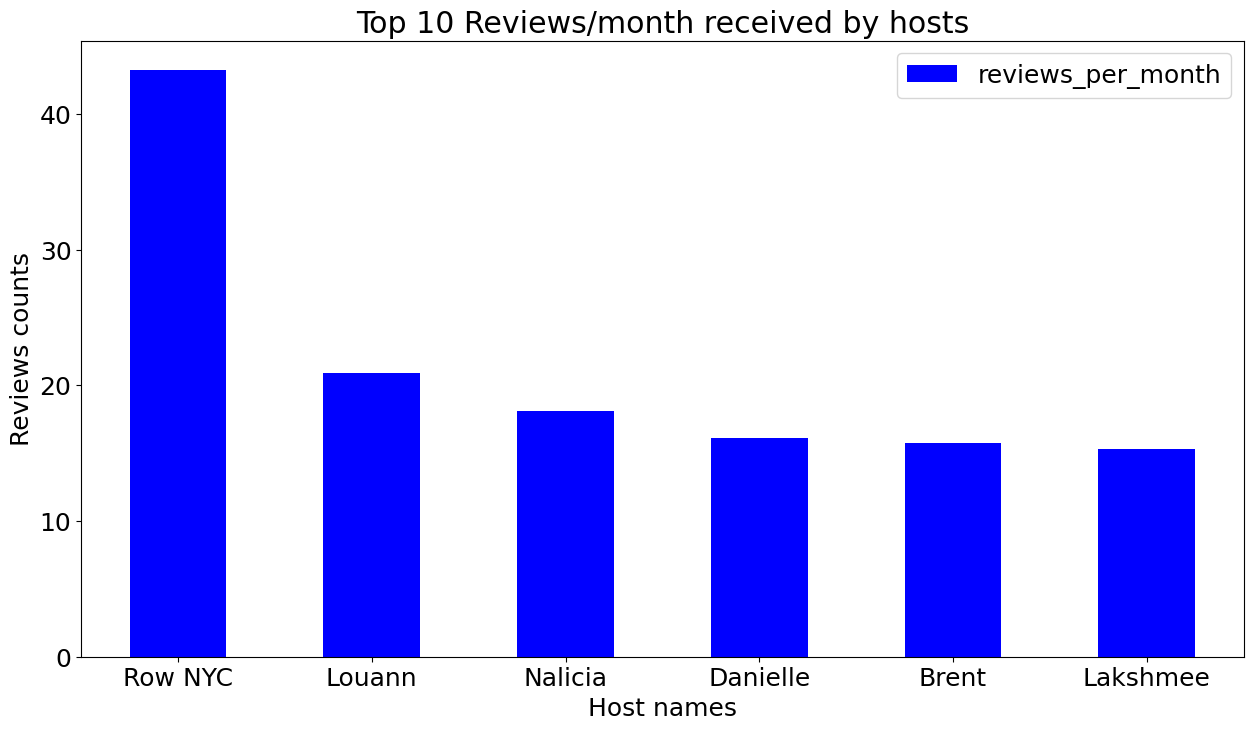

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 18
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean()
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='b',rot = 0)
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')
plt.show()

Row NYC holds the title as the most reviewed host with more than 40 reviews/month on average



**7.On an average for how many nights people stayed in each room_types**


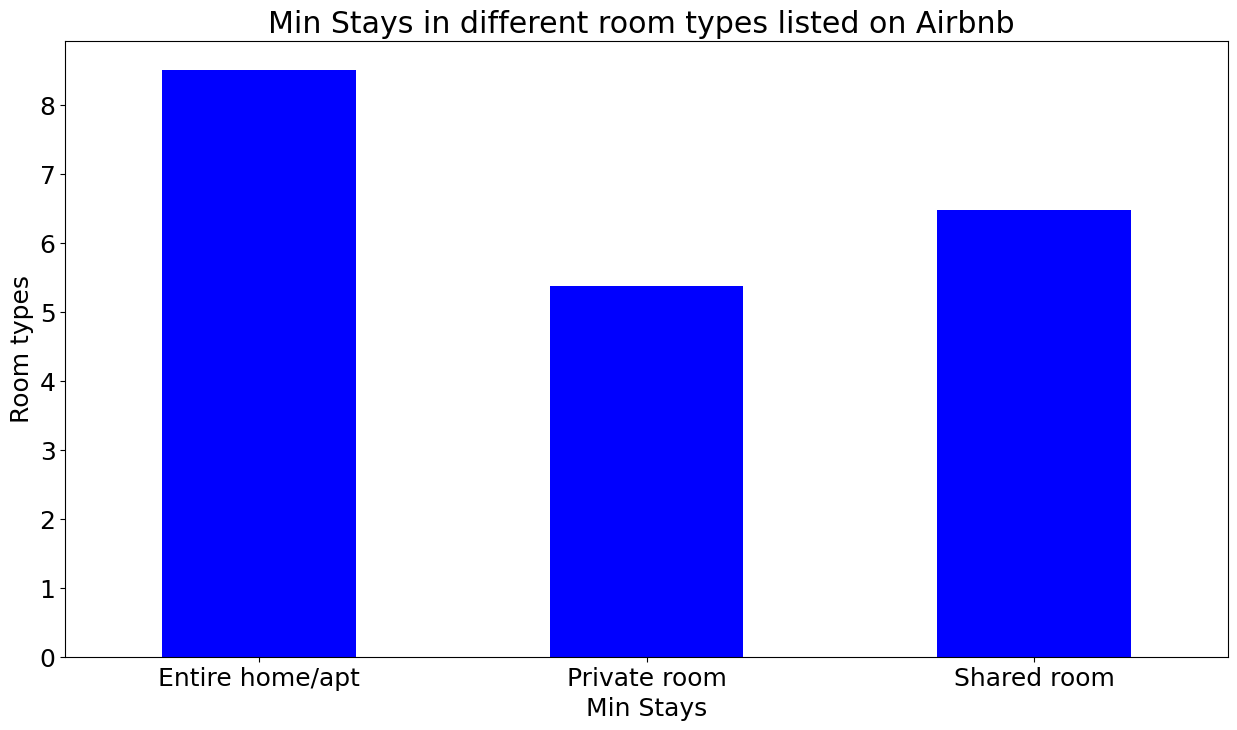

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] =18
df_airbnb.groupby('room_type')['minimum_nights'].mean().plot(kind='bar',color='b',rot = 0)
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Min Stays')
plt.ylabel('Room types')
plt.show()

Looking at these it clearly indicates that people mostly prefer living in an entire **home/apt **on an average of more than *8 nights followed by guests who stayed in shared room where average stay is **6-7** **nights**.

# **Bi-variable Analysis**

**1.count of each room types in neighbourhood group entire NYC**

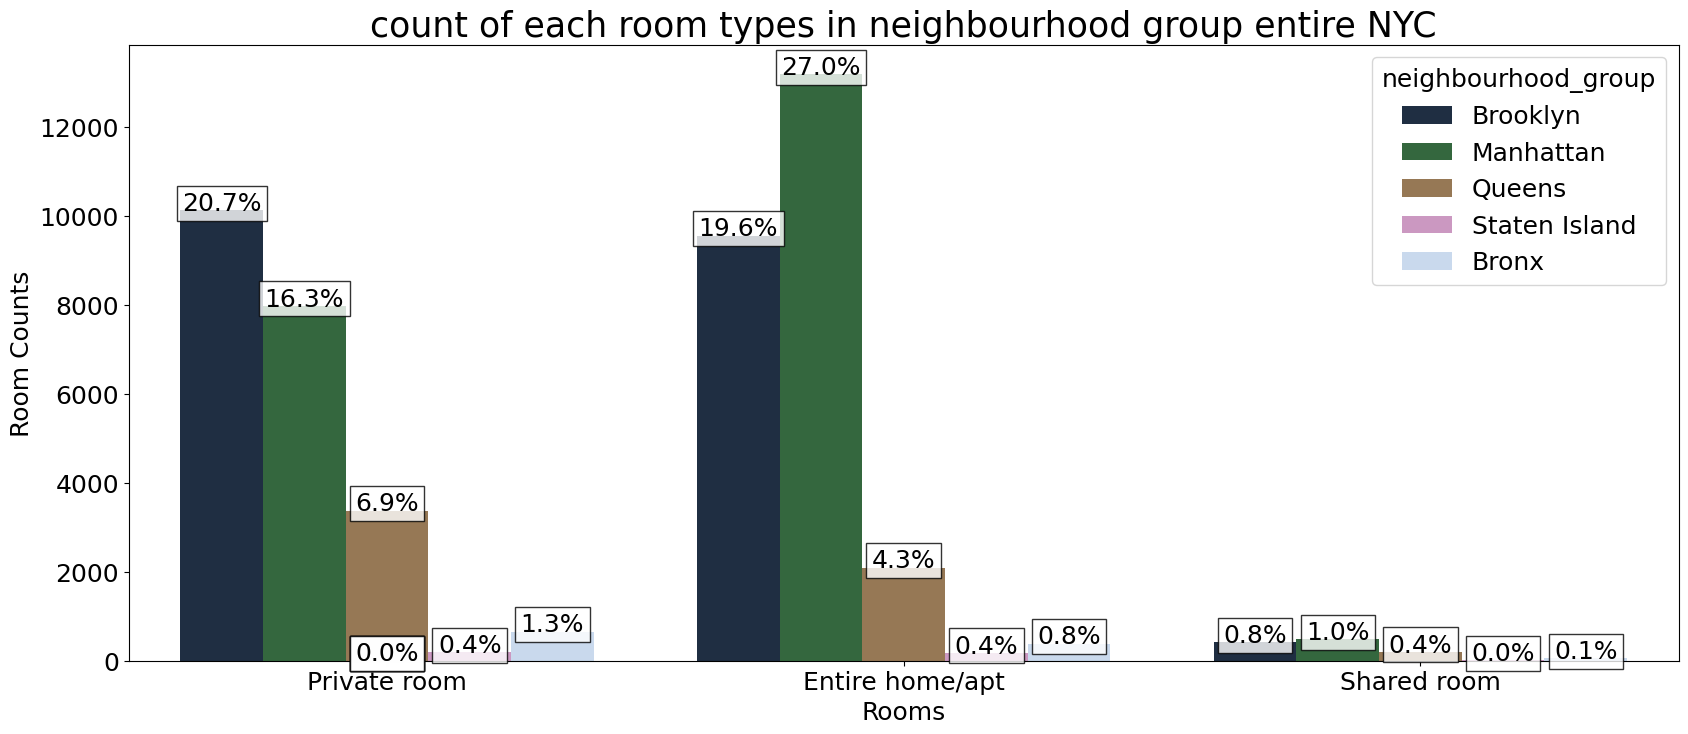

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] =18
ax= sns.countplot(x='room_type',hue='neighbourhood_group',data=df_airbnb,palette='cubehelix')

total = len(df_airbnb['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x,y), ha = 'center',bbox = dict(facecolor = 'white', alpha =.8))

plt.title('count of each room types in neighbourhood group entire NYC',size=25)
plt.xlabel('Rooms')
plt.xticks(rotation=0)
plt.ylabel('Room Counts')

plt.show()



 Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types




**2.count of each room types in top 10 neighbourhoods in entire NYC**



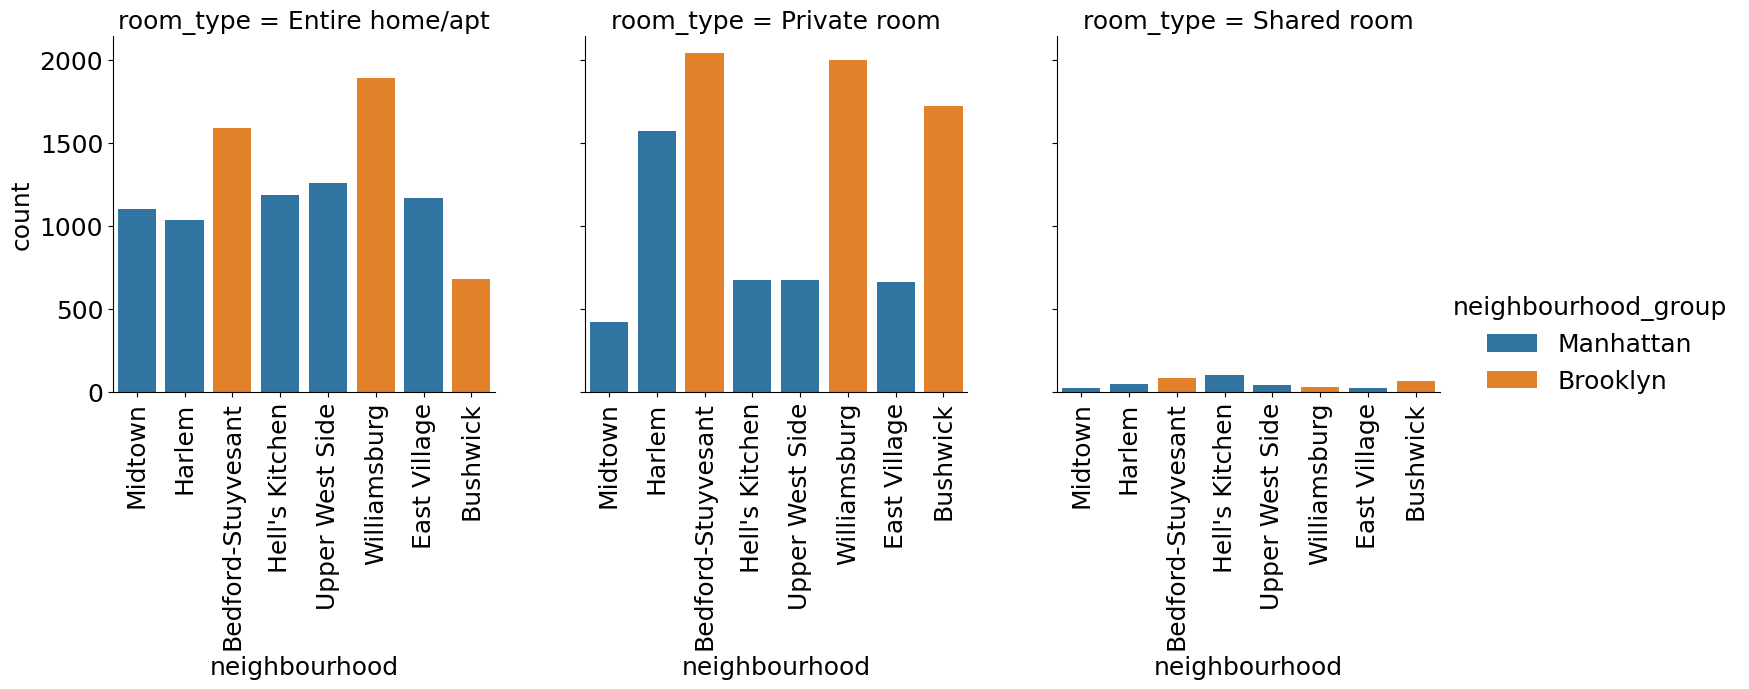

In [ ]:
#top 10 neighbourhoods roomtypes
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] =18
sub_data = df_airbnb[df_airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem',
                                              'Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side''Crown Heights','Midtown'])]

viz3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_data , kind='count')
viz3.set_xticklabels(rotation=90)



People mostly prefer living in an entire home/apt on an average of more than 8 nights followed by guests who stayed in shared room where average stay is 6-7 nights



**3.monthly reviews varies with room types in each neighbourhood groups**

In [ ]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df_airbnb.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','room_type' , 'reviews_per_month','neighbourhood_group']]

name        room_type  \
42075  Enjoy great views of the City in our Deluxe Room!     Private room   
42076           Great Room in the heart of Times Square!     Private room   
38870                 Lou's Palace-So much for so little     Private room   
27287  JFK Comfort.5 Mins from JFK Private Bedroom & ...     Private room   
28651      JFK 2 Comfort 5 Mins from JFK Private Bedroom     Private room   
29628      JFK 3 Comfort 5 Mins from JFK Private Bedroom     Private room   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE     Private room   
22469  Cute Tiny Room Family Home by LGA NO CLEANING FEE     Private room   
36238                                 “For Heaven Cakes”  Entire home/apt   
40297        Studio Apartment 6 minutes from JFK Airport     Private room   

       reviews_per_month neighbourhood_group  
42075              58.50           Manhattan  
42076              27.95           Manhattan  
38870              20.94              Queens  
27287              19.75              Queens  
28651              17.82              Queens  
29628              16.81              Queens  
20403              16.22              Queens  
22469              16.03              Queens  
36238              15.78              Queens  
40297              15.32              Queens

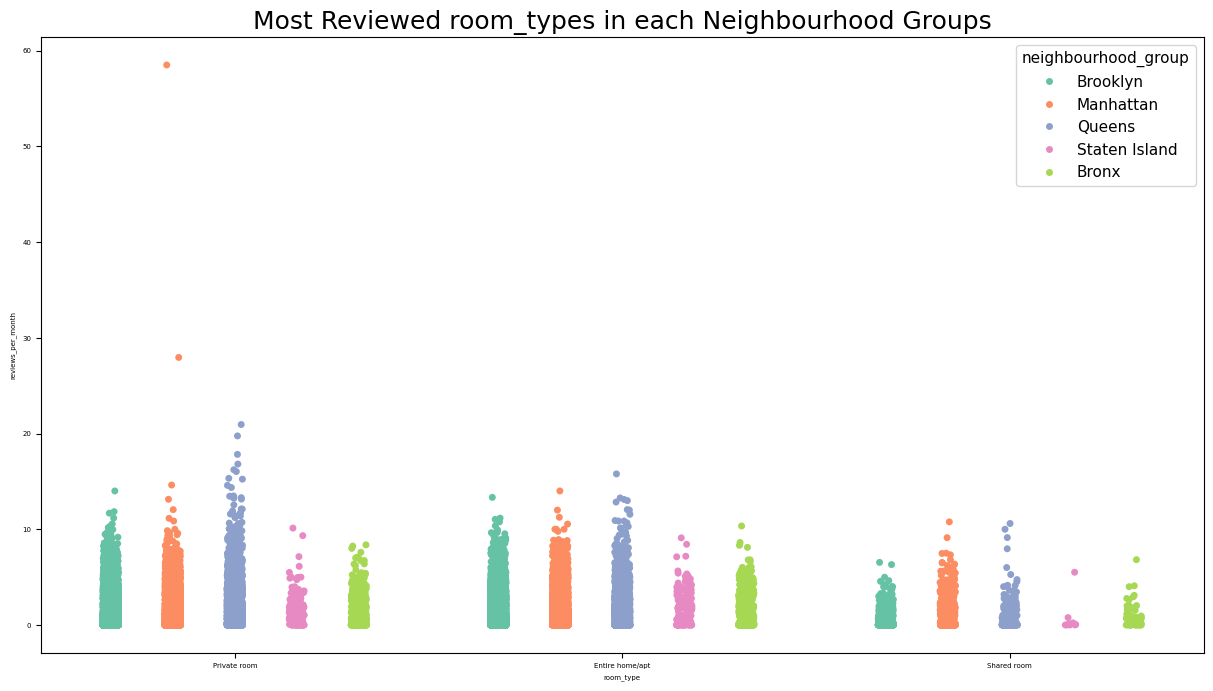

In [ ]:
f,ax = plt.subplots(figsize=(15,8))
plt.rcParams['font.size']=11
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=df_airbnb,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups',size=18)
plt.show()

We can see that Private room recieved the most no of reviews/month where Manhattan had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Manhattan in the chase.

Manhattan & Queens got the most no of reviews for Entire home/apt room type.

There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

***4.Hosts with most no of listings in NYC(on the basis of host listings count)***

In [ ]:
host_with_most_listings= df_airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(5,'calculated_host_listings_count')
largest_listings_df

host_name neighbourhood_group  calculated_host_listings_count
13217    Sonder (NYC)           Manhattan                          106929
1834       Blueground           Manhattan                           53360
7275             Kara           Manhattan                           14669
6540   Jeremy & Laura           Manhattan                            9216
13216          Sonder           Manhattan                            9216

Sonder(NYC) leads rooms in the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara.

**5.Room_types and their relation with availability and also with different neighbourhood groups**

<ipython-input-48-fbe79fbea93f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'neighbourhood_group', y= 'availability_365', data = df_airbnb, palette = "bright")


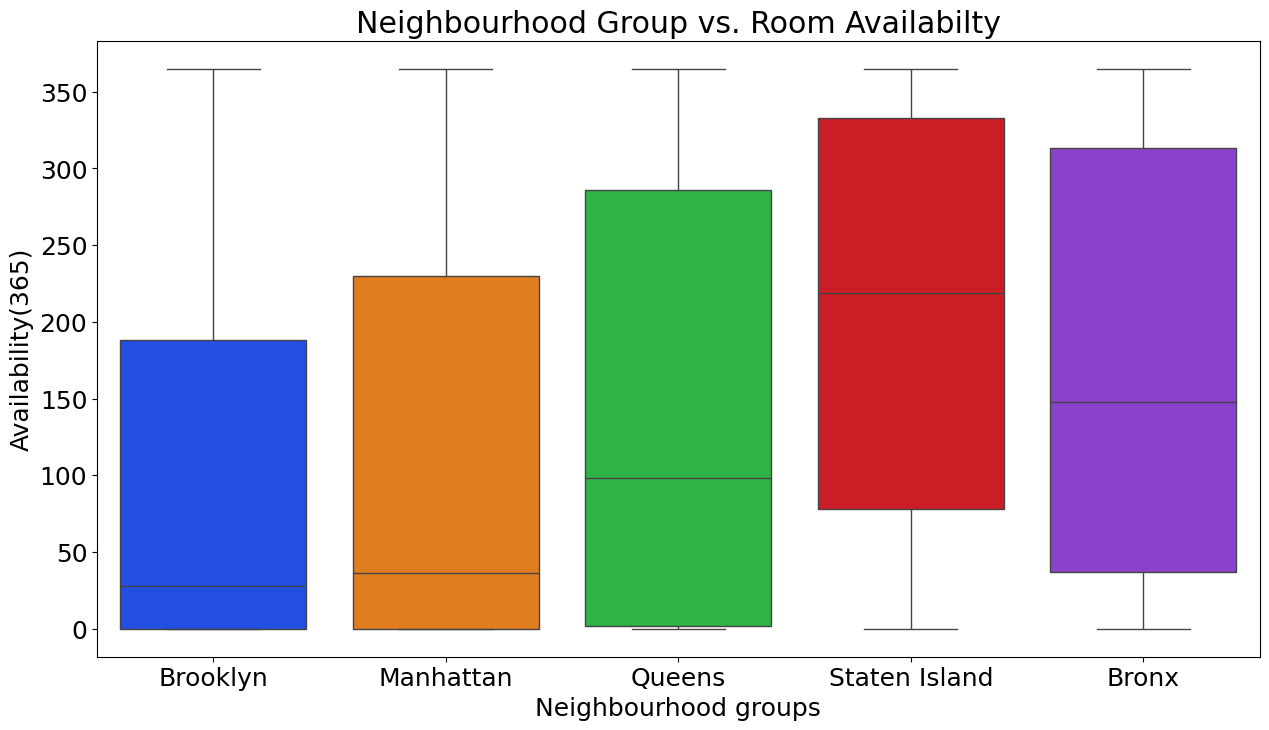

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] =18
sns.boxplot(x = 'neighbourhood_group', y= 'availability_365', data = df_airbnb, palette = "bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

we can infer that the listings in Staten Island seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every yea


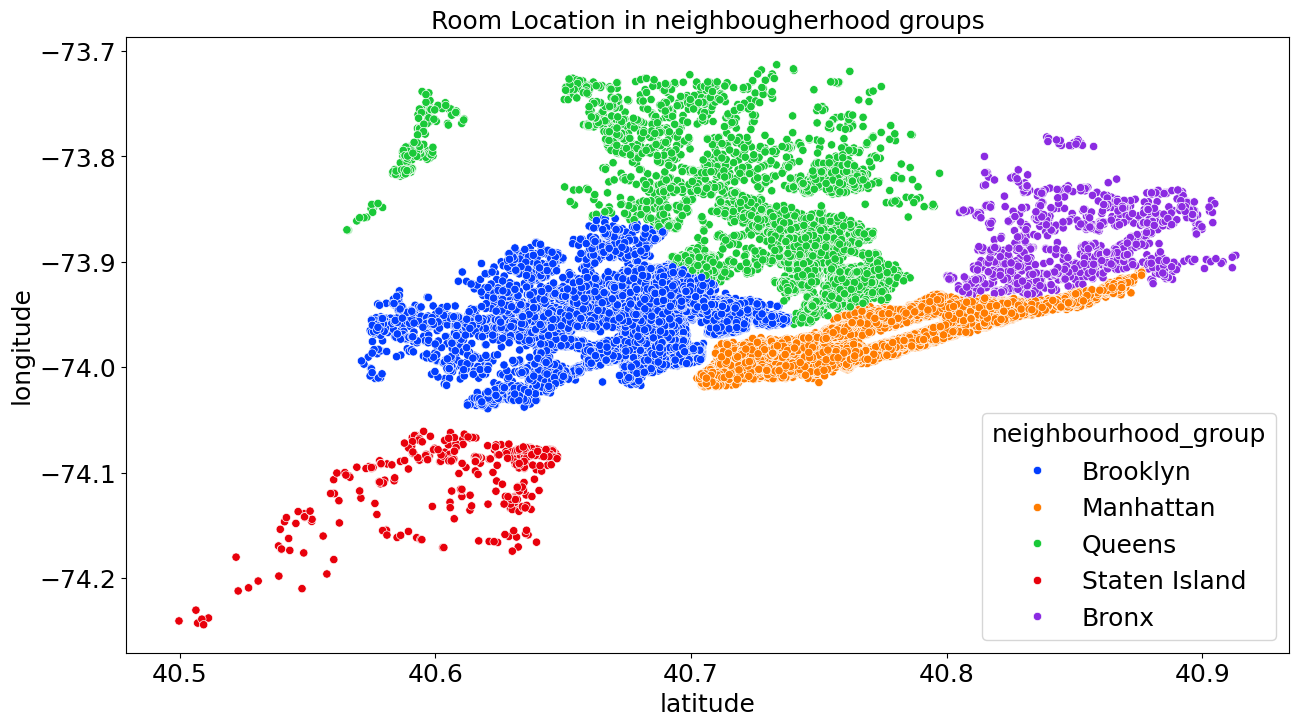

In [ ]:
# Room Location in neighbougherhood groups
plt.figure(figsize=(15,8))
plt.rcParams['font.size'] =18
ax = sns.scatterplot(x = 'latitude',y = 'longitude',data = df_airbnb, hue ='neighbourhood_group',palette='bright' )
ax.set_title('Room Location in neighbougherhood groups',size=18)
plt.show()

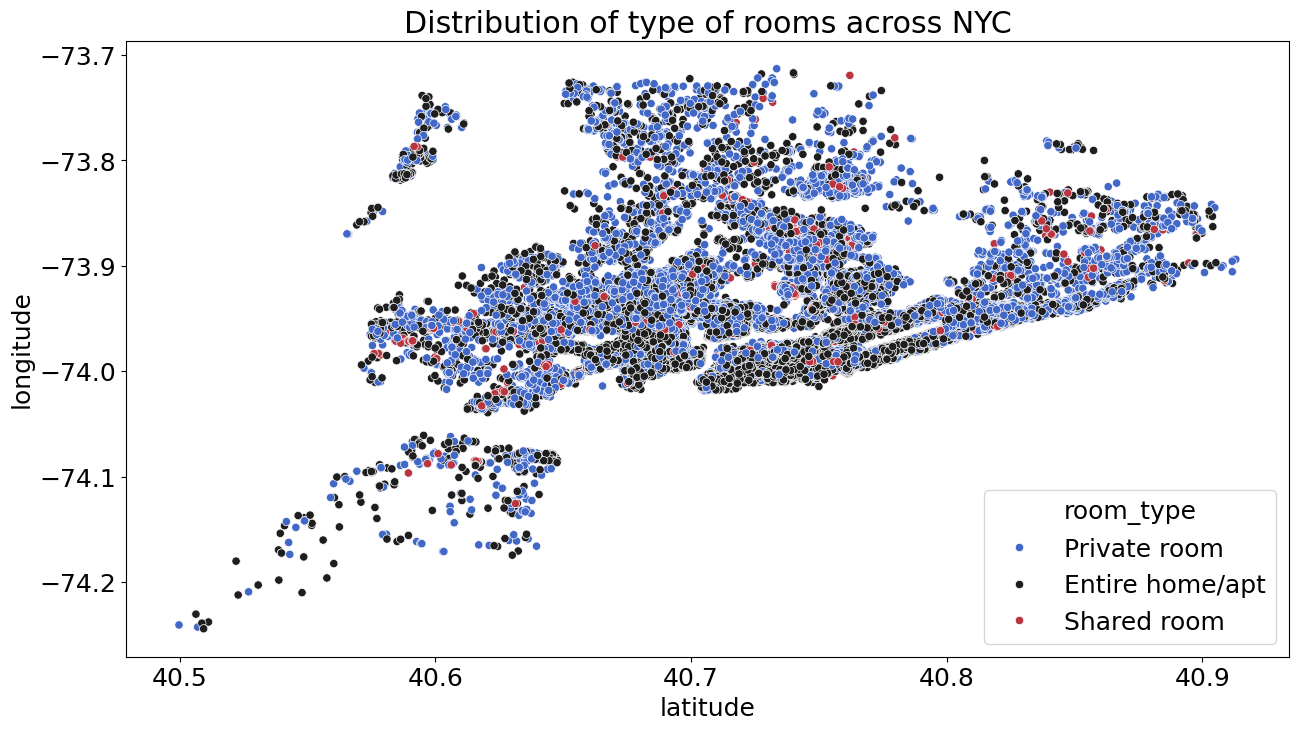

In [ ]:
# Distribution of type of rooms across NYC
plt.figure(figsize=(15,8))
plt.rcParams['font.size'] =18
ax =sns.scatterplot(x = df_airbnb['latitude'],y = df_airbnb['longitude'],hue = df_airbnb['room_type'],palette ="icefire")
ax.set_title('Distribution of type of rooms across NYC')
plt.show()

By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt.

95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

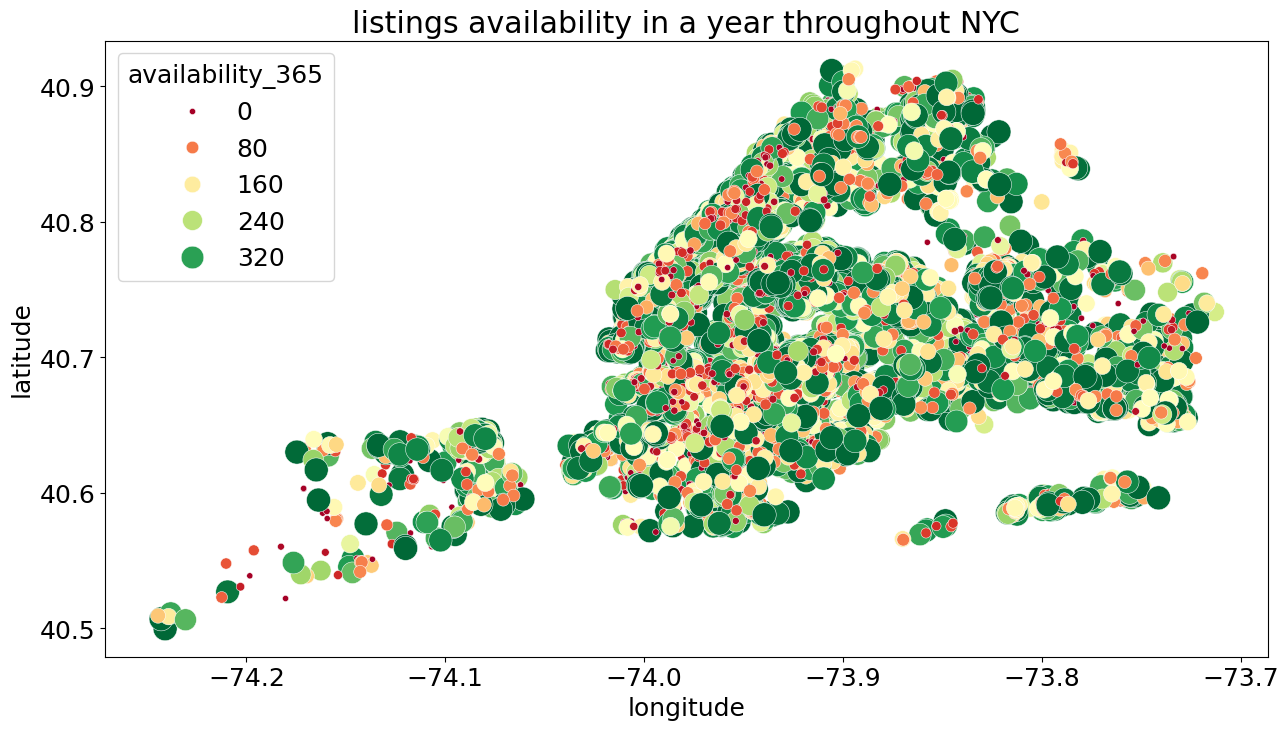

In [ ]:
#  listings availability in a year throughout NYC
f, ax = plt.subplots(figsize=(15, 8))
plt.rcParams['font.size'] = 18
ax = sns.scatterplot(data=df_airbnb, x='longitude', y='latitude', hue="availability_365", palette='RdYlGn', size='availability_365',
    sizes=(20, 300))
ax.set_title('listings availability in a year throughout NYC')
plt.show()

Bronx & Staten Island has listings which are mostly available throughout the year, this might be the case as they are not much costlier as compared to other neighbourhood groups such as in Manhanttan, Brooklyn & Queens.

# Now lets check out the main feature which is '**price**' and its **corelation** with other important features.

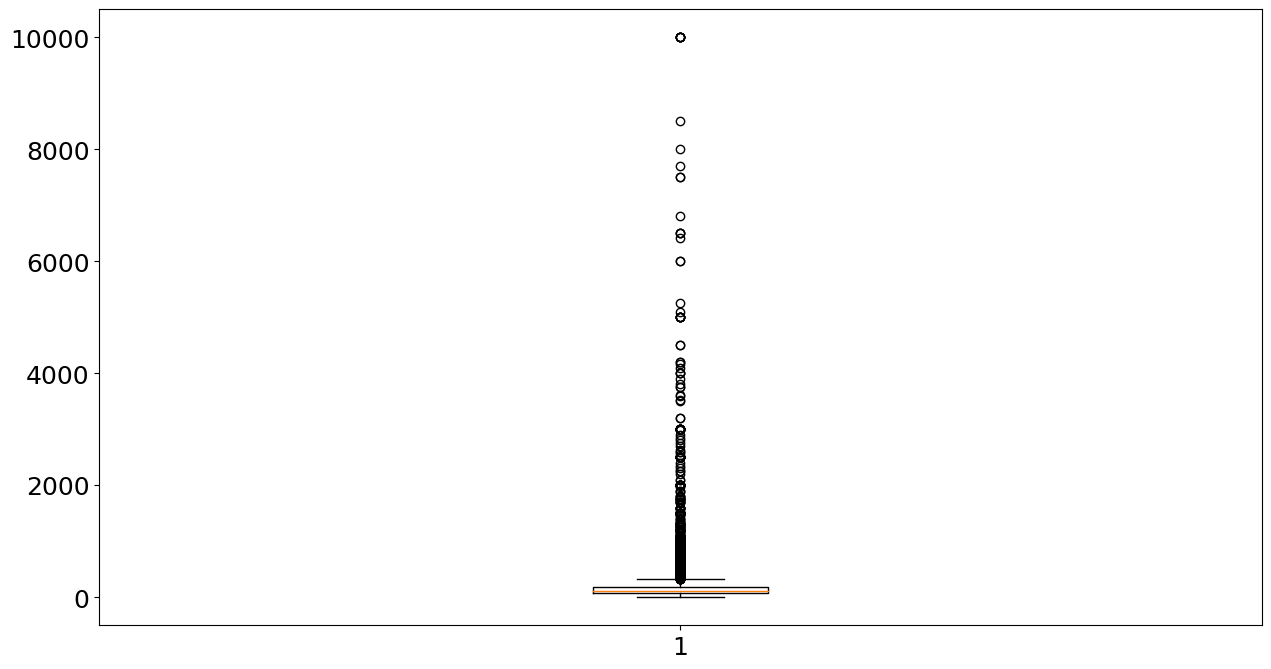

In [ ]:
plt.boxplot(df_airbnb['price'])
plt.show()

As, boxplot shows that feature column (i,e Price) has many outliars. So, we have to remove those outliars for better result's


## **Quantile approach** to remove outliers.

In [ ]:
min_bound,max_bound= df_airbnb.price.quantile([0.01,0.999])
min_bound,max_bound

(30.0, 3000.0)

In [ ]:
#checking outliers
df_airbnb[df_airbnb.price<min_bound]

name    host_id  \
957                    Enjoy Staten Island Hospitality    1887999   
2675               Central, Peaceful Semi-Private Room    5912572   
2860     Large furnished 2 bedrooms- - 30 days Minimum    2196224   
3020                Small Cozy Room Wifi & AC near JFK    9284163   
3918                     Bright, Airy Room Share for 2    4973668   
...                                                ...        ...   
48486                     Cable and wfi, L/G included.  272872092   
48647    Cozy bedroom in diverse neighborhood near JFK  273393150   
48832                         FLATBUSH HANG OUT AND GO  267223765   
48867  The place you were dreaming for.(only for guys)  261338177   
48868                     Heaven for you(only for guy)  261338177   

         host_name neighbourhood_group       neighbourhood  latitude  \
957    Rimma & Jim       Staten Island        Graniteville  40.62109   
2675       Tangier            Brooklyn            Flatbush  40.63899   
2860         Sally           Manhattan        East Village  40.73051   
3020       Antonio              Queens           Woodhaven  40.68968   
3918        Gloria            Brooklyn  Bedford-Stuyvesant  40.68642   
...            ...                 ...                 ...       ...   
48486        Chris              Queens        Forest Hills  40.73657   
48647         Liza              Queens       Richmond Hill  40.68639   
48832       Jarmel            Brooklyn            Flatbush  40.64922   
48867        Diana            Brooklyn           Gravesend  40.59080   
48868        Diana            Brooklyn           Gravesend  40.59118   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
957    -74.16534     Private room     20               3                 80   
2675   -73.95177      Shared room     29               2                  5   
2860   -73.98140  Entire home/apt     10              30                  0   
3020   -73.85219     Private room     29               2                386   
3918   -73.93440      Shared room     25               5                 76   
...          ...              ...    ...             ...                ...   
48486  -73.85088  Entire home/apt     16               9                  1   
48647  -73.81847     Private room     28               2                  0   
48832  -73.96078      Shared room     20               1                  0   
48867  -73.97116      Shared room     25               1                  0   
48868  -73.97119      Shared room     25               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
957                 0.92                               1               226  
2675                0.07                               1               321  
2860                0.00                               4               137  
3020                5.53                               3                50  
3918                1.22                               3               258  
...                  ...                             ...               ...  
48486               1.00                               1               322  
48647               0.00                               1                24  
48832               0.00                               3               363  
48867               0.00                               6               338  
48868               0.00                               6               365  

[404 rows x 14 columns]

In [ ]:
#Checking Outliers
df_airbnb[df_airbnb.price>max_bound]

name    host_id  \
1862                    Sunny, Family-Friendly 2 Bedroom    4289240   
2698                 Beautiful 1 Bedroom in Nolita/Soho      213266   
3537                  UWS 1BR w/backyard + block from CP    2151325   
3695                 NYC SuperBowl Wk 5 Bdrs River View    11353904   
3720                 SuperBowl Penthouse Loft 3,000 sqft    1483320   
3774                    SUPER BOWL Brooklyn Duplex Apt!!   11598359   
3788                  Prime NYC Location for Super Bowl     1427243   
4345                    NearWilliamsburg bridge 11211 BK   14908606   
4376                                Photography Location    1177497   
4377                                       Film Location    1177497   
6530                                  Spanish Harlem Apt    1235070   
9151                 Furnished room in Astoria apartment   20582832   
12342                Quiet, Clean, Lit @ LES & Chinatown    3906464   
15560                 Luxury townhouse Greenwich Village   66240032   
17665        VIP Duplex Townhouse with Private Garden!!!   49186997   
17692    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
21821  The Otheroom Bar/Event/Filming Space -read det...   18037301   
22353                            Victorian Film location    2675644   
25825                                           Fulton 2  100069033   
25901    Greenwich Village Townhome with Private Garden!  147814925   
26739                                         Broadway 1  153497815   
28946   Chelsea Gallery Space for events and exhibitions    3750764   
28947   Chelsea Gallery for events, exhibitions, fashion    3750764   
29238                                1-BR Lincoln Center   72390391   
29662          East 72nd Townhouse by (Hidden by Airbnb)  156158778   
29663          East 7th Street III by (Hidden by Airbnb)  156158778   
29664          Park Avenue Mansion by (Hidden by Airbnb)  156158778   
30268  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   18128455   
34851             A Night at Anchor Aboard Yacht Ventura   45863742   
37194               Apartment New York \nHell’s Kitchens   35303743   
37864                 NYC HOLIDAY!!!!   April 15- May 15    2039658   
38000      4-Floor Unique Event Space 50P Cap. - #10299B  172611460   
39243     Furnished 1000sq large 2bed + office in Harlem  229458601   
40433  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
41216             West 88th Street by (Hidden by Airbnb)  156158778   
42523                70' Luxury MotorYacht on the Hudson    7407743   
42542             West 84th Street by (Hidden by Airbnb)  156158778   
42736  30 days minimum Time square West Midtown apart...  177396569   
43009    Midtown Manhattan great location (Gramacy park)   16105313   
43670   Beautiful private Brooklyn room with kitchenette    8748976   
44034                   3000 sq ft daylight photo studio    3750764   
45666                               Gem of east Flatbush  262534951   
45867        bay ridge & sunset park furnished apartment  263564234   
46614                     Northside Williamsburg Stunner     956324   
48043       Luxury TriBeCa Apartment at an amazing price  271248669   

         host_name neighbourhood_group       neighbourhood  latitude  \
1862          Lucy            Brooklyn    Prospect Heights  40.67919   
2698       Jessica           Manhattan              Nolita  40.72193   
3537   Jay And Liz           Manhattan     Upper West Side  40.77782   
3695          Todd           Manhattan     Upper West Side  40.79476   
3720          Omri           Manhattan        Little Italy  40.71895   
3774      Jonathan            Brooklyn        Clinton Hill  40.68766   
3788       Jordana           Manhattan        East Village  40.73323   
4345        Bianca            Brooklyn  Bedford-Stuyvesant  40.69572   
4376       Jessica            Brooklyn        Clinton Hill  40.69127   
4377       Jessica            Brooklyn        Clinton Hill  40.69

In [ ]:
# new dataset without outliers
df_airbnb_new_price = df_airbnb[(df_airbnb.price>min_bound)&(df_airbnb.price<max_bound)]
df_airbnb_new_price

name   host_id  \
0                     Clean & quiet apt home by the park      2787   
1                                  Skylit Midtown Castle      2845   
2                    THE VILLAGE OF HARLEM....NEW YORK !      4632   
3                        Cozy Entire Floor of Brownstone      4869   
4       Entire Apt: Spacious Studio/Loft by central park      7192   
...                                                  ...       ...   
48890    Charming one bedroom - newly renovated rowhouse   8232441   
48891      Affordable room in Bushwick/East Williamsburg   6570630   
48892            Sunny Studio at Historical Neighborhood  23492952   
48893               43rd St. Time Square-cozy single bed  30985759   
48894  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                   0.00                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
48890               0.00                               2                 9  
48891               0.00                               2                36  
48892               0.00                               1                27  
48893               0.00                               6                 2  
48894               0.00                               1                23  

[48183 rows x 14 columns]

<ipython-input-86-0406ea007ec1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_airbnb_new_price['price'],color='r')


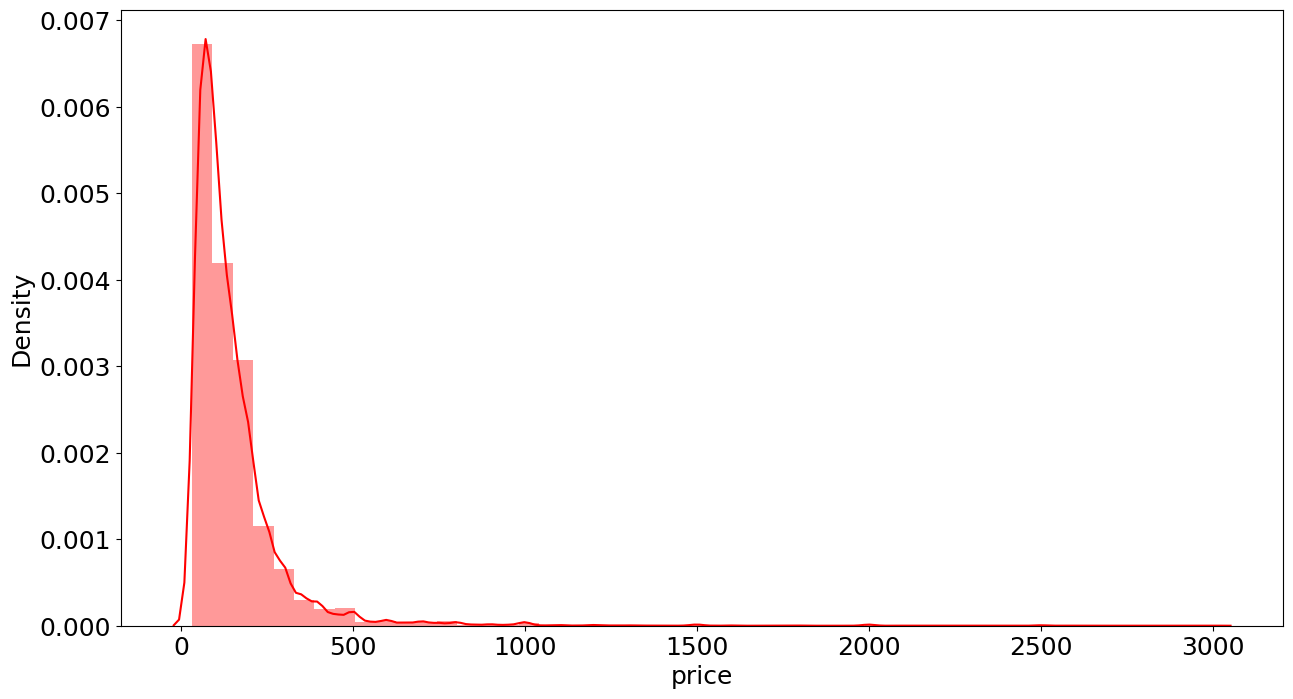

In [ ]:
#checking distribution for this new price
sns.distplot(df_airbnb_new_price['price'],color='r')
plt.show()

**1.Room_types vs price in different neighbourhood groups**

<ipython-input-105-6225c192ebe4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g =sns.catplot(x="room_type", y="price", col="neighbourhood_group",


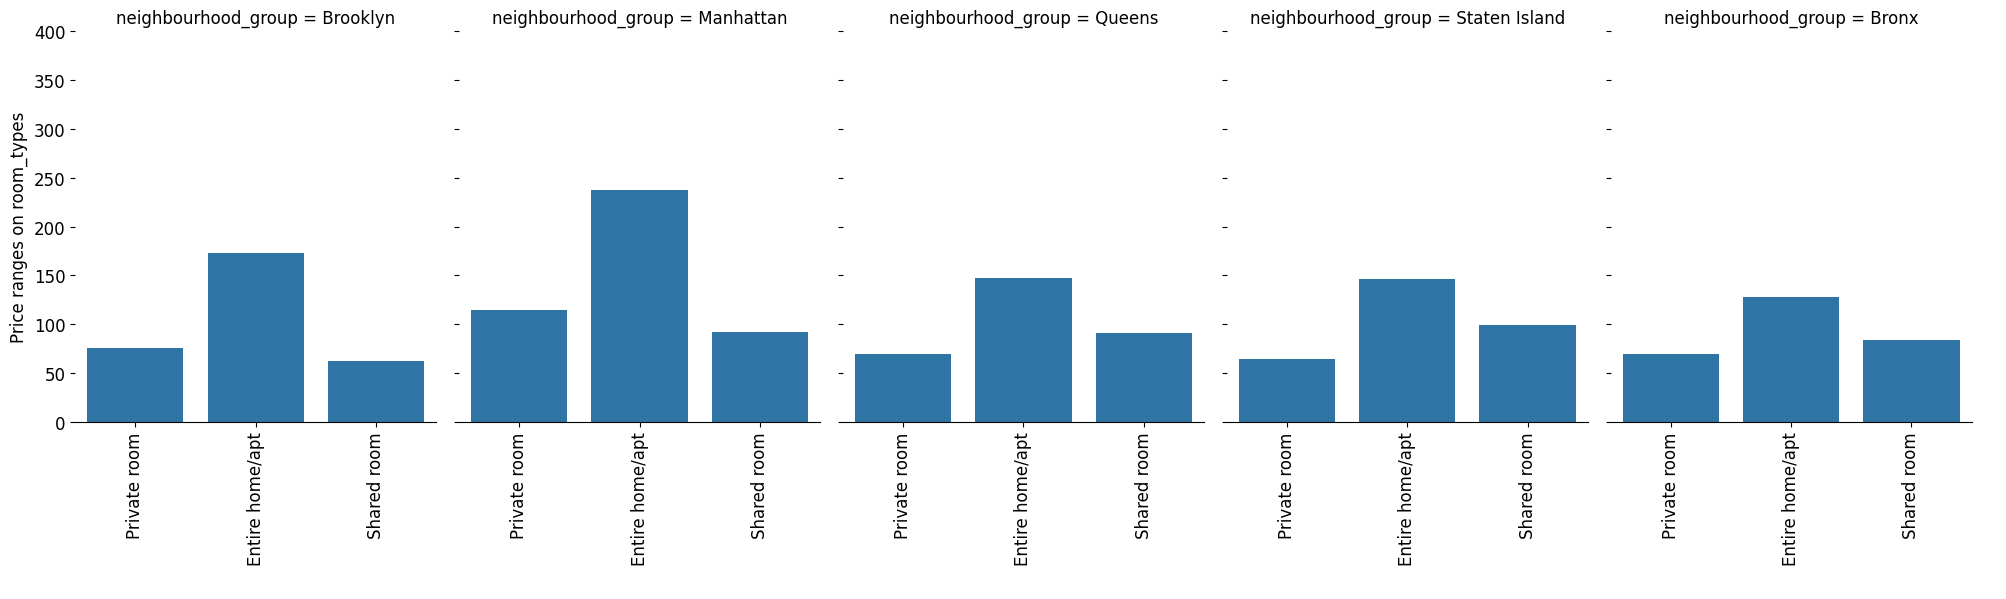

In [ ]:
#room_type vs price
plt.rcParams['font.size']=12
g =sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_airbnb_new_price, kind = 'bar',ci = None, saturation=0.8,aspect=0.8)
(g.set_axis_labels(" ", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True))
plt.show()

Looks like a property/listing with Entire home/apt as room_type wins the show at NYC followed by private rooms.

Manhattan has the highest price for room types with Entire home/apt ranging to nearly 240 USD/night, followed by Private room with 110 USD/night. And it's obvious being the most expensive place to live in!


**2. The costliest and chepest listings & their respective hosts in entire NYC:**

In [ ]:
# The costliest
df_airbnb_new_price.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type' ,'price']]

name neighbourhood_group  \
38498                 LUXURIOUS 5 bedroom, 4.5 bath home           Manhattan   
48304      Next to Times Square/Javits/MSG! Amazing 1BR!           Manhattan   
46533                          Amazing Chelsea 4BR Loft!           Manhattan   
30824  Designer's Beautiful 2BR Apartment in NOLITA/SOHO           Manhattan   
22992  Modern Townhouse for Photo, Film &  Daytime Ev...           Manhattan   

         neighbourhood        host_name        room_type  price  
38498  Upper West Side             Lisa  Entire home/apt   2999  
48304   Hell's Kitchen          Rogelio  Entire home/apt   2999  
46533          Chelsea         Viberlyn  Entire home/apt   2995  
30824           Nolita  Ilo And Richard  Entire home/apt   2990  
22992  Upper West Side            Lanie  Entire home/apt   2900

Looks like the all the top 5 costliest listings belongs to **Manhattan** itself(being the most costliest place of living in NYC)

In [ ]:
# The cheapest
df_airbnb_new_price.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:5]

name neighbourhood_group  \
12516          cute and cozy room in brooklyn            Brooklyn   
7864               Comfortable and Large Room            Brooklyn   
29967           Large bed room share bathroom              Queens   
39100          15 minutes From Times Square!!           Manhattan   
28700  Cozy room in Loft Apartment - Brooklyn              Queens   

            neighbourhood host_name     room_type  price  
12516  Bedford-Stuyvesant   Ornella  Private room     31  
7864             Flatbush       Kay  Private room     31  
29967            Elmhurst       Cha  Private room     31  
39100  Washington Heights       Ari  Private room     31  
28700           Ridgewood  Estefani  Private room     31

Cheapest listings mostly comes from **Brooklyn**, **Queens** and all are private rooms which makes sense

**3.costliest cheapest listings in each neighbourhood groups & their respective hosts**

In [ ]:
# costliest listing
costliest_df= df_airbnb_new_price.loc[df_airbnb_new_price.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]
costliest_df.sort_values(by='price',ascending=False)

name neighbourhood_group  \
38498                 LUXURIOUS 5 bedroom, 4.5 bath home           Manhattan   
29665         Park Place Townhouse by (Hidden by Airbnb)            Brooklyn   
42680                      Majestic Mansion LifeStyle :)              Queens   
24477                            "The luxury of Comfort"               Bronx   
45572  Central Hall Colonial with Free Parking Bus EX...       Staten Island   

        host_name  price  
38498        Lisa   2999  
29665       Sally   2626  
42680        Shah   2600  
24477       Kathy   2500  
45572  Anastasios   1250

In [ ]:
# cheapest listings
cheapest_df= df_airbnb_new_price.loc[df_airbnb_new_price.groupby(['neighbourhood_group'])['price'].idxmin()][['name','neighbourhood_group','host_name','price']]
cheapest_df.sort_values(by='price',ascending=True)

name neighbourhood_group  \
2887                              Amazing Spacious Room            Brooklyn   
7431   Cozy room right on BROADWAY - Washington Heights           Manhattan   
6615                 Super Clean, Quiet & Spacious Room              Queens   
30312      Nice room near SI Ferry \n15 minutes by car.       Staten Island   
3889                               A Simple, Calm Space               Bronx   

         host_name  price  
2887   Lord Daniel     31  
7431           Nga     31  
6615          Troy     31  
30312       Sara I     31  
3889          Août     32

**4.Top neighbourhoods groups in NYC with respect to average price/day of Airbnb listings**

In [ ]:
df_grpn= df_airbnb_new_price.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
top_neigh_each= df_grpn.loc[df_grpn.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

neighbourhood_group   neighbourhood       price
188       Staten Island  Fort Wadsworth  800.000000
88             Brooklyn        Sea Gate  487.857143
34                Bronx       Riverdale  442.090909
121           Manhattan         Tribeca  410.531429
163              Queens        Neponsit  274.666667

Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: Fort Wadsworth & Sea Gate, origins from Staten Island & Brooklyn

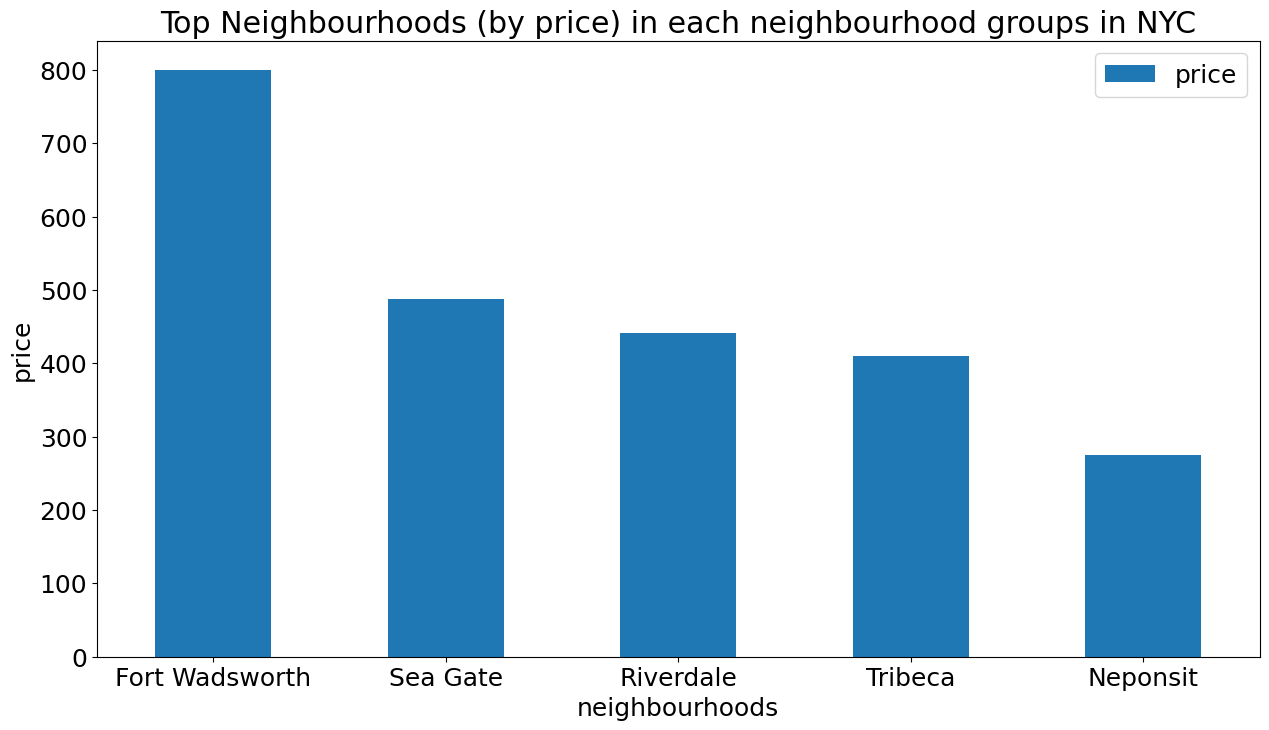

In [ ]:
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size'] =18
top_neigh_each.plot.bar(x='neighbourhood', rot = 0 , title='Top Neighbourhoods (by price) in each neighbourhood groups in NYC')

plt.xlabel('neighbourhoods')
plt.ylabel('price')
plt.show()

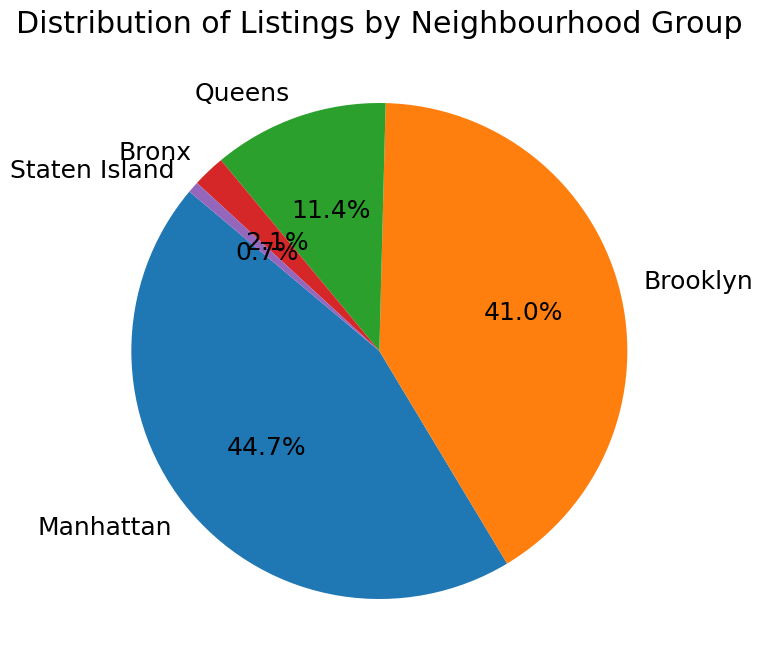

In [ ]:
neighbourhood_group_counts = df_airbnb_new_price['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 18))
plt.pie(neighbourhood_group_counts, labels=neighbourhood_group_counts.index, autopct='%2.1f%%', startangle=140)
plt.title('Distribution of Listings by Neighbourhood Group')
plt.show()


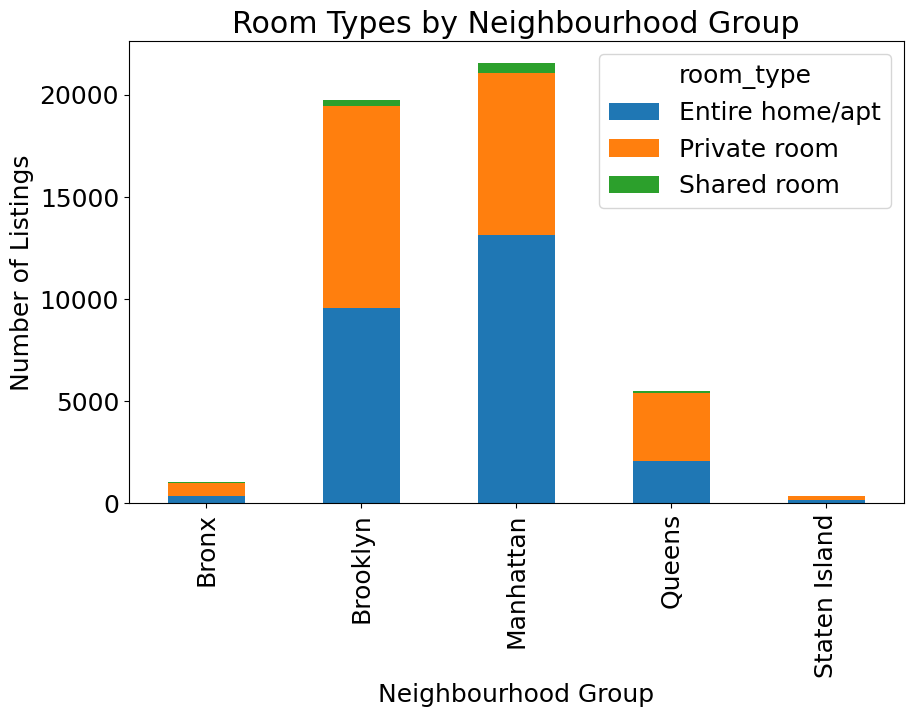

In [ ]:
room_type_neighbourhood = pd.crosstab(df_airbnb_new_price['neighbourhood_group'], df_airbnb_new_price['room_type'])
room_type_neighbourhood.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Room Types by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()


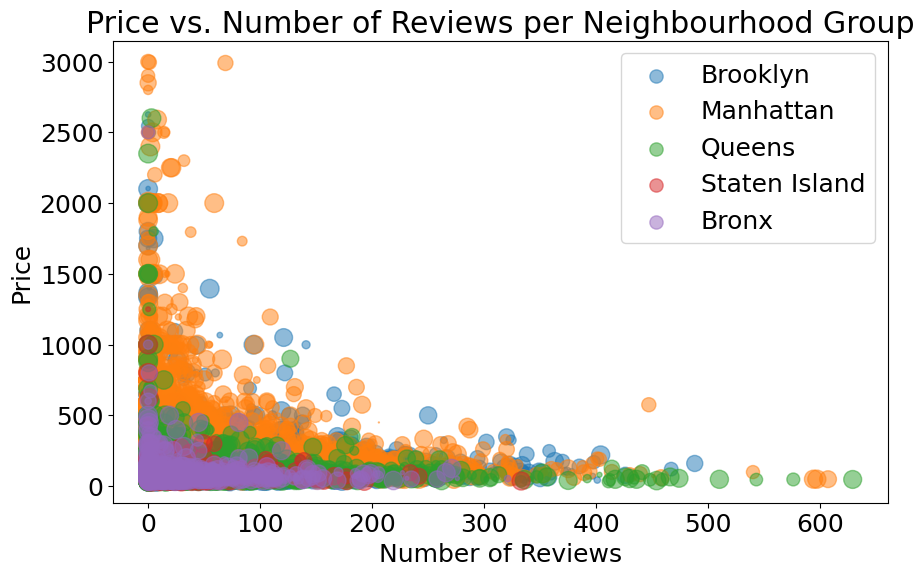

In [ ]:
plt.figure(figsize=(10, 6))
for group in df_airbnb_new_price['neighbourhood_group'].unique():
    group_data = df_airbnb_new_price[df_airbnb_new_price['neighbourhood_group'] == group]
    plt.scatter(group_data['number_of_reviews'], group_data['price'], s=group_data['availability_365']/2, label=group, alpha=0.5)
plt.title('Price vs. Number of Reviews per Neighbourhood Group')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.legend()
plt.show()


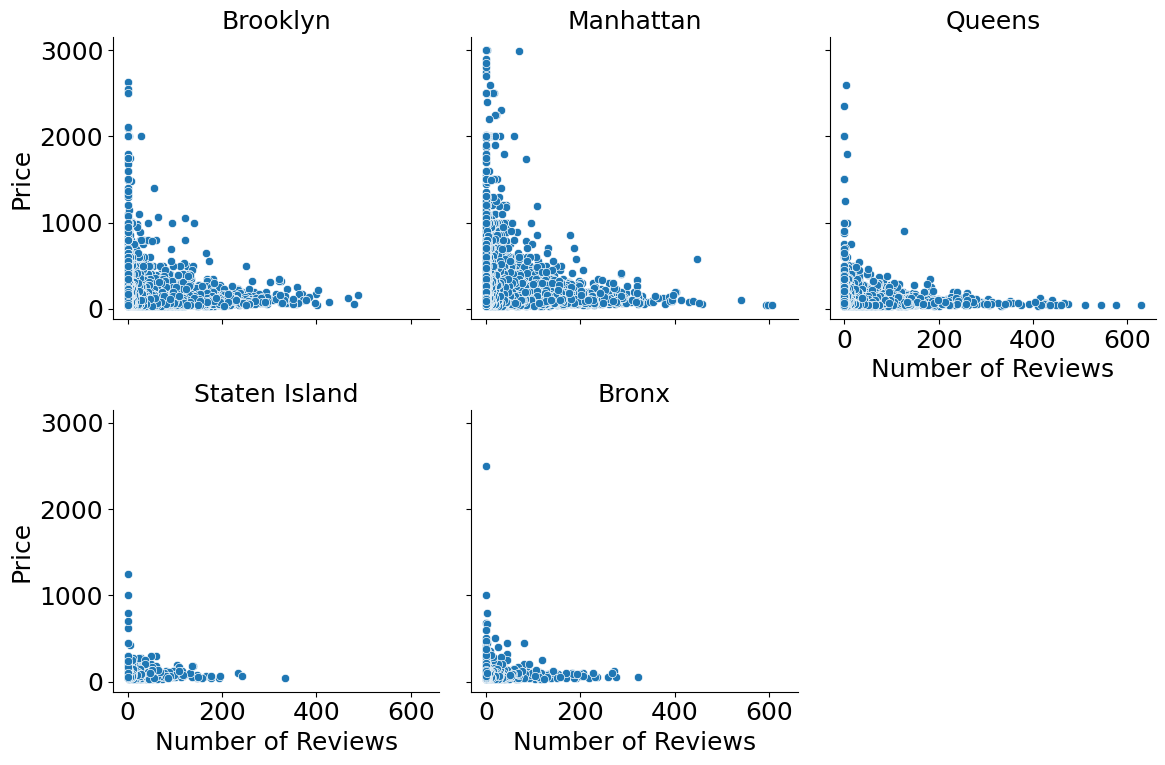

In [ ]:
g = sns.FacetGrid(df_airbnb_new_price, col="neighbourhood_group", col_wrap=3, height=4)
g.map(sns.scatterplot, "number_of_reviews", "price")
g.set_titles("{col_name}")
g.set_axis_labels("Number of Reviews", "Price")
plt.show()


<ipython-input-132-fa5f3781bc18>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



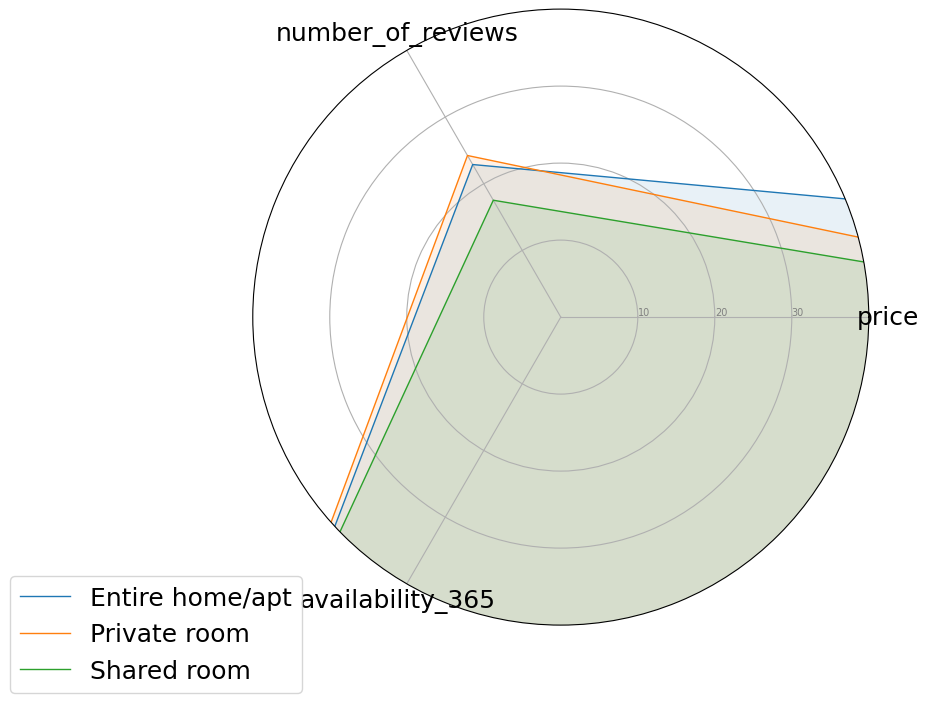

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi

# Sample DataFrame - Replace this with your actual data and groupby logic
# Assuming df_airbnb_new_price is your DataFrame
grouped_data = df_airbnb_new_price.groupby('room_type').mean()[['price', 'number_of_reviews', 'availability_365']]

# Number of variables we're plotting
categories = list(grouped_data)
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
plt.ylim(0,40)

# Plot data and fill area for each room type
for i, row in grouped_data.iterrows():
    data = row.values.flatten().tolist()
    data += data[:1]
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=i)
    ax.fill(angles, data, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df_airbnb_new_price, x='number_of_reviews', y='price', color='neighbourhood_group')
fig.show()


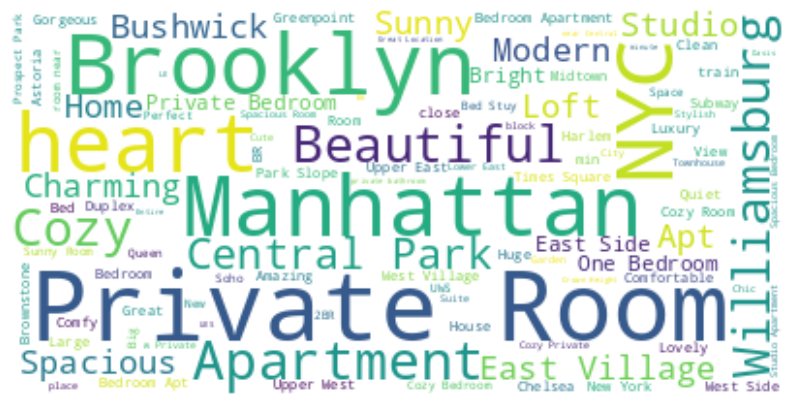

In [134]:
from wordcloud import WordCloud
text = ' '.join(df_airbnb_new_price['name'].fillna(''))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
